# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [53]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [54]:
sinasc_raw['SEXO']

0        Masculino
1         Feminino
2         Feminino
3         Feminino
4         Feminino
           ...    
27023    Masculino
27024    Masculino
27025    Masculino
27026    Masculino
27027    Masculino
Name: SEXO, Length: 27028, dtype: object

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [243]:
sinasc_1 = sinasc_raw[['IDADEMAE','IDADEPAI','munResNome']]
sinasc_1.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

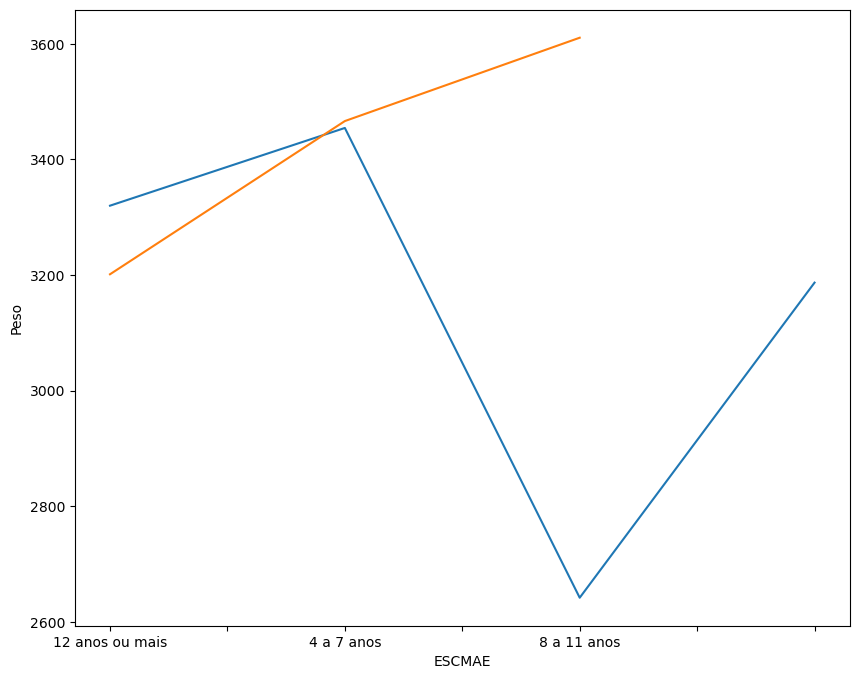

In [56]:
# Forma 1
sinasc_2 = sinasc_raw[['DTNASC','SEXO','ESCMAE','PESO']]
nasci = sinasc_2[sinasc_2['DTNASC'] == '2019-07-15']
fem = nasci[nasci['SEXO'] == 'Feminino'].groupby('ESCMAE')['PESO'].mean()
masc = nasci[nasci['SEXO'] == 'Masculino'].groupby('ESCMAE')['PESO'].mean()
fem.plot(figsize=(10,8))
masc.plot()
plt.ylabel('Peso');

In [57]:
nasci.groupby(['ESCMAE','SEXO'])['PESO'].mean().unstack()

SEXO,Feminino,Masculino
ESCMAE,,
1 a 3 anos,3320.000000,NaN
12 anos ou mais,3454.444444,3201.363636
4 a 7 anos,2641.888889,3466.363636
8 a 11 anos,3186.904762,3610.526316


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [75]:
# Verificando o município que nasceu menos bebê.
sinasc_1['munResNome'].value_counts().tail()

munResNome
Parecis                    44
Primavera de Rondônia      43
Pimenteiras do Oeste       40
Castanheiras               32
Município ignorado - RO     1
Name: count, dtype: int64

Como o município com menos bebê tem o nome "Município ignorado e tem apenas um bebê foi selecionar o segundo município com menos bebê, no caso Castanheiras.

In [77]:
mun_menos_bebe = sinasc_1['munResNome'].value_counts().index[-2]
mun_menos_bebe

'Castanheiras'

In [93]:
# Vendo a idade média, máxima e mínima dos pais e mães no município.
sinasc_1.groupby('munResNome').agg([('Média','mean'),('Máxima','max'),('Mínima','min')]).loc[mun_menos_bebe]

IDADEMAE  Média     27.281250
          Máximo    39.000000
          Mínimo    17.000000
IDADEPAI  Média     30.392857
          Máximo    43.000000
          Mínimo    17.000000
Name: Castanheiras, dtype: float64

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [215]:
# Selecionando as variaveis necessárias.
sinasc_3 = sinasc_raw[['munResNome','DTNASC','QTDFILVIVO','IDADEPAI','IDADEMAE']]
# Convertendo a coluna DTNASC para datetime.
sinasc_3['DTNASC'] = pd.to_datetime(sinasc_3['DTNASC'])


C:\Users\Kevin\AppData\Local\Temp\ipykernel_19544\213103774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_3['DTNASC'] = pd.to_datetime(sinasc_3['DTNASC'])


In [223]:
# Função que retorna apenas valores do mês de escolha, no nosso caso, março.
def escolha_mes(df, mes=3, column = 'DTNASC'):
    df = df[df[column].dt.month == mes].reset_index(drop=True)
    return df
escolha_mes(sinasc_3)

,munResNome,DTNASC,QTDFILVIVO,IDADEPAI,IDADEMAE
0,Alto Alegre dos Parecis,2019-03-20,0.0,24.0,30
1,Alta Floresta D'Oeste,2019-03-23,1.0,27.0,30
2,Alta Floresta D'Oeste,2019-03-27,2.0,40.0,33
3,Alta Floresta D'Oeste,2019-03-11,1.0,41.0,30
4,Alta Floresta D'Oeste,2019-03-11,1.0,28.0,31
...,...,...,...,...,...
2451,Porto Velho,2019-03-21,0.0,NaN,24
2452,Porto Velho,2019-03-22,2.0,NaN,24
2453,Porto Velho,2019-03-07,1.0,42.0,35
2454,Vilhena,2019-03-30,2.0,NaN,36


In [238]:
# Função que escolhe o município que mais nasceu bebê.
def escolhe_top_mun(df):
    return df['munResNome'].value_counts().idxmax() 
# Escolhendo o município que mais nasceu bebê no mês de março.
municipio = escolhe_top_mun(escolha_mes(sinasc_3))
municipio

'Porto Velho'

In [240]:
# Fazendo uma função que calcula o valor médio, máximo e minímo para cada variável.
def media_max_min(df, column='munResNome'):
    df = df.groupby(column).agg([('Média','mean'),('Máximo','max'),('Minímo','min')])
    return df
# Vendo qual o valor médio, máximo e minímo para cada variável no município que mais nasceu bebê em março.
media_max_min(escolha_mes(sinasc_3)).loc[municipio]

DTNASC      Média     2019-03-15 20:38:42.580645120
            Máximo              2019-03-31 00:00:00
            Minímo              2019-03-01 00:00:00
QTDFILVIVO  Média                          1.295056
            Máximo                              9.0
            Minímo                              0.0
IDADEPAI    Média                         34.629032
            Máximo                             62.0
            Minímo                             19.0
IDADEMAE    Média                         26.596774
            Máximo                               44
            Minímo                               14
Name: Porto Velho, dtype: object

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

Seguindo o exemplo, algumas das coisas que pude observar através do que foi feito nos exercícios são:
- A Idade média dos Pais costuma ser pelo menos 4 anos maior que a Idade média das mães.
- No mês de março em Porto Velho tivemos que a Idade minima de uma mãe é 14 anos enquanto a de um pai é 19.
- Ainda no mês der março no mesmo município tiivemos que a idade máxima de um Pai é 62 enquanto da mãe é de 44.
Isso provavelmente nos mostra que tem muitos relacionamentos com grande disparidade de Idade em que homens mais velhos buscam se envolver com mulheres mais jovens.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')